In [1]:
# Import packages
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
import pickle
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
plt.style.use('seaborn')

First train without the exog parameters.

In [5]:
# Load the data
pacific = pickle.load(open('./../Data/pacific_series.pickle', 'rb'))
atlantic = pickle.load(open('./../Data/atlantic_series.pickle', 'rb'))

kenneth = pacific[28]
emily = atlantic[20]

hurricanes = [kenneth, emily]

for i in hurricanes:
    display(i)

,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 11,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS
21244,EP112005,KENNETH,23.7,154.6,20,1015,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21245,20050914,1800,12.3,118.0,30,1009,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21246,20050915,0000,12.8,118.7,30,1006,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21247,20050915,0600,12.9,119.3,40,1002,40,40,0,20,...,0,0,0,0,0,0,0,0,0,1
21248,20050915,1200,12.9,119.8,50,997,45,45,45,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21304,20050929,1200,18.9,148.7,30,1012,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21305,20050929,1800,19.0,149.8,30,1012,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21306,20050930,0000,19.1,150.9,30,1012,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21307,20050930,0600,19.2,152.0,25,1013,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


,Date,Time,Latitude,Longitude,Max Wind,Min Pressure,Wind Radii Max Extent 1,Wind Radii Max Extent 2,Wind Radii Max Extent 3,Wind Radii Max Extent 4,...,Wind Radii Max Extent 12,Status DB,Status EX,Status HU,Status LO,Status SD,Status SS,Status TD,Status TS,Status WV
45925,AL052005,EMILY,45.8,79.8,10,1009,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45926,20050711,0000,10.7,42.4,25,1010,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45927,20050711,0600,10.8,43.4,30,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45928,20050711,1200,10.9,44.4,30,1009,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45929,20050711,1800,11.0,45.4,30,1007,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45930,20050712,0000,11.0,46.8,35,1006,30,20,20,30,...,0,0,0,0,0,0,0,0,1,0
45931,20050712,0600,11.0,48.5,40,1005,30,20,20,30,...,0,0,0,0,0,0,0,0,1,0
45932,20050712,1200,11.0,50.2,45,1004,45,20,20,45,...,0,0,0,0,0,0,0,0,1,0
45933,20050712,1800,11.0,52.0,45,1004,45,20,20,45,...,0,0,0,0,0,0,0,0,1,0
45934,20050713,0000,11.0,53.7,45,1003,50,50,25,50,...,0,0,0,0,0,0,0,0,1,0


Optimization terminated successfully.
         Current function value: -0.946891
         Iterations: 29
         Function evaluations: 8686


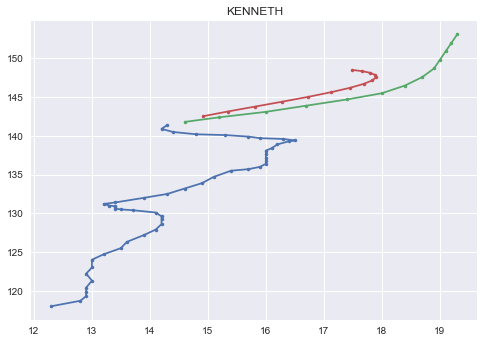

Optimization terminated successfully.
         Current function value: -0.466143
         Iterations: 57
         Function evaluations: 16843


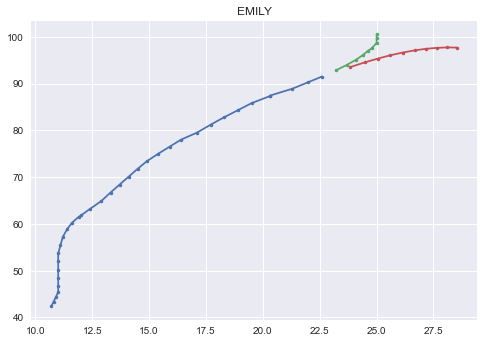

In [13]:
p, q = 3, 2
for hurr in hurricanes:
    # Train on a single hurricane
    hurr = hurr.drop(columns=['Status DB',
       'Status EX', 'Status HU', 'Status LO', 'Status SD', 'Status SS',
       'Status TD', 'Status TS'])
    N = hurr.shape[0]
    cutoff = N//5*4
    X = hurr.iloc[1:cutoff, 4:6].to_numpy() # Train on 80% of the data
    y = hurr.iloc[1:cutoff, 2:4].to_numpy() # Train on 80% of the data
    y_test = hurr.iloc[cutoff:, 2:4].to_numpy()
    X_test = hurr.iloc[cutoff:, 4:6].to_numpy()
    model = VARMAX(y, order=(p, q)).fit(method='powell', maxiter=1000)
    pred = model.predict(start=cutoff, end=N)
    plt.plot(y[:, 0], y[:, 1], label='Observations', marker='.')
    plt.plot(y_test[:, 0], y_test[:, 1], label='True Trajectory', marker='.')
    plt.plot(pred[:, 0], pred[:, 1], label='Predicted Trajectory', marker='.')
    hurr_name = hurr.iloc[0, 1].strip()
    plt.title(hurr_name)
    plt.show()
    
    # Save the results of the hurricanes we want
    stuff_dict = {}
    stuff_dict['Hurricane Name'] = hurr_name
    stuff_dict['Observed Points'] = y
    stuff_dict['Used Parameters other than Long and Lat'] = False
    stuff_dict['True Trajectory'] = y_test
    stuff_dict['Predicted Trajectory'] = pred
    stuff_dict['Model Parameters (p, q)'] = p, q
    pickle.dump(stuff_dict, open(f'./../Data/VARMAX_{hurr_name}.pickle', 'wb'))

Train with the exog parameters now.

In [4]:
# for i in rand_hurricanes:
#     # Train on a single hurricane
#     hurr = pacific[i].drop(columns=['Status DB',
#        'Status EX', 'Status HU', 'Status LO', 'Status SD', 'Status SS',
#        'Status TD', 'Status TS'])
#     N = hurr.shape[0]
#     cutoff = N//5*4
#     X = hurr.iloc[1:cutoff, 4:6].to_numpy() # Train on 80% of the data
#     y = hurr.iloc[1:cutoff, 2:4].to_numpy() # Train on 80% of the data
#     y_test = hurr.iloc[cutoff:, 2:4].to_numpy()
#     X_test = hurr.iloc[cutoff:, 4:6].to_numpy()
#     model = VARMAX(y, X, order=(p, q)).fit(method='powell', maxiter=1000)
#     pred = model.predict(exog=X_test, start=cutoff, end=cutoff+X_test.shape[0]-2)
#     plt.plot(y[:, 0], y[:, 1], label='Observations', marker='.')
#     plt.plot(y_test[:, 0], y_test[:, 1], label='True Trajectory', marker='.')
#     plt.plot(pred[:, 0], pred[:, 1], label='Predicted Trajectory', marker='.')
#     plt.show()